In [1]:
# Data Handling and Manipulation
import csv
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\d214\Combined_Online_Retail.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
# Calculate the total number of elements in the DataFrame
total_elements = df.size

# Calculate the number of missing values
missing_values = df.isnull().sum().sum()

# Calculate the number of zero values
zero_values = (df == 0).sum().sum()

# Calculate sparsity based on missing values only
sparsity_missing = (missing_values / total_elements) * 100

# Calculate sparsity based on missing values and zero values
sparsity_total = ((missing_values + zero_values) / total_elements) * 100

print(f"Sparsity based on missing values only: {sparsity_missing:.2f}%")
print(f"Sparsity based on missing values and zero values: {sparsity_total:.2f}%")

Sparsity based on missing values only: 2.90%
Sparsity based on missing values and zero values: 2.97%


In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


## Data Preparation

### Finding Missing and Duplicated Values. Also, removing unnecessary values

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Description      4382
Customer ID    243007
dtype: int64


In [9]:
# Remove rows with missing Customer ID in place
df.dropna(subset=['Customer ID'], inplace=True)

In [10]:
# Filter out rows where the 'Invoice' column starts with 'C'
df = df[~df['Invoice'].str.startswith('C')]

In [11]:
# Find duplicated rows
duplicates = df[df.duplicated()]

# Count the number of duplicated rows
num_duplicates = duplicates.shape[0]

print(f'Number of duplicate rows: {num_duplicates}')

# Remove duplicates
df.drop_duplicates(inplace=True)

Number of duplicate rows: 26124


In [12]:
# Count NaN values in each column
nan_values_per_column = df.isna().sum()

print('Number of NaN values per column:')
print(nan_values_per_column)

Number of NaN values per column:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


### Removing unnecessary stock codes

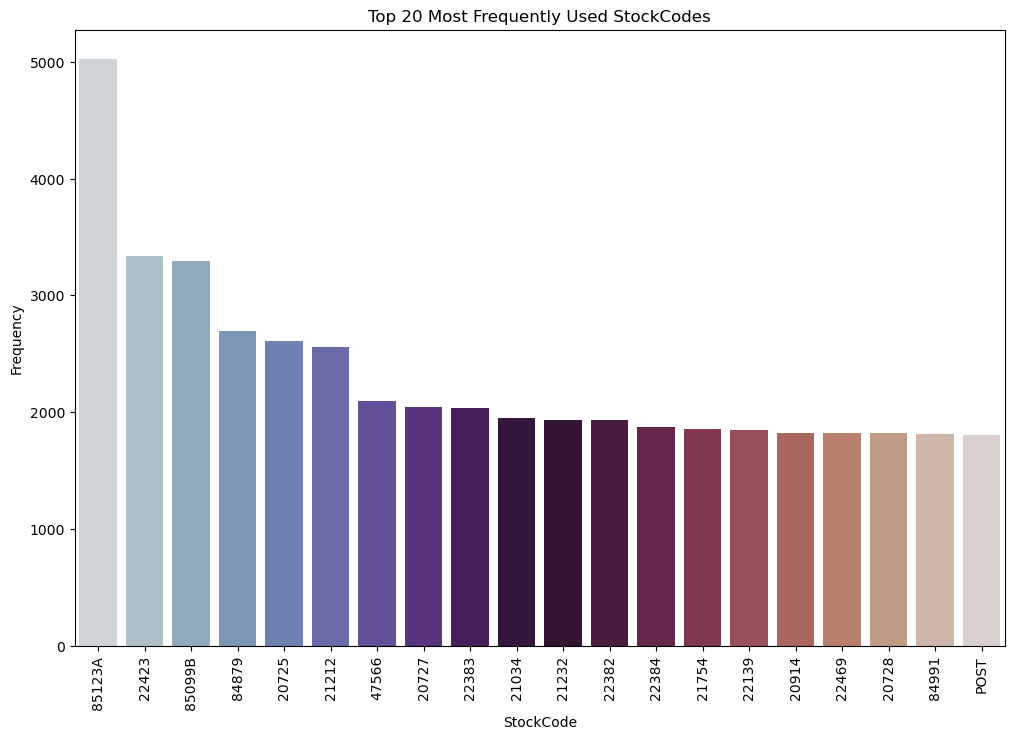

In [13]:
# Count the frequency of each unique StockCode
stock_code_counts = df['StockCode'].value_counts().reset_index()
stock_code_counts.columns = ['StockCode', 'Frequency']

# Plot a bar chart of the most frequently used StockCodes
plt.figure(figsize=(12, 8))
sns.barplot(x='StockCode', y='Frequency', data=stock_code_counts.head(20), palette='twilight')
plt.title('Top 20 Most Frequently Used StockCodes')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.savefig("stockcodes.png")
plt.show()

In [14]:
# Calculate the length of each StockCode and count occurrences
stock_code_length_counts = df['StockCode'].apply(len).value_counts()

print(stock_code_length_counts)

StockCode
5     690646
6      84992
4       1821
7       1049
1        693
2        248
12        31
3         16
Name: count, dtype: int64


In [15]:
# Filter for StockCodes with lengths less than 5
short_stock_codes = df[df['StockCode'].apply(len) < 5]['StockCode'].unique()

# Count occurrences of these short StockCodes
short_stock_code_counts = df[df['StockCode'].isin(short_stock_codes)]['StockCode'].value_counts()

# Get descriptions for these short StockCodes
short_stock_code_descriptions = df[df['StockCode'].isin(short_stock_codes)][['StockCode', 'Description']].drop_duplicates()

print("Unique StockCodes with lengths less than 5:")
print(short_stock_codes)

print("\nOccurrences of these StockCodes:")
print(short_stock_code_counts)

print("\nDescriptions of these StockCodes:")
print(short_stock_code_descriptions)

Unique StockCodes with lengths less than 5:
['POST' 'C2' 'M' 'PADS' 'D' 'DOT']

Occurrences of these StockCodes:
StockCode
POST    1803
M        688
C2       248
PADS      18
DOT       16
D          5
Name: count, dtype: int64

Descriptions of these StockCodes:
       StockCode                 Description
89          POST                     POSTAGE
9292          C2                    CARRIAGE
11310          M                      Manual
62299       PADS  PADS TO MATCH ALL CUSHIONS
160443         D                    Discount
842968       DOT              DOTCOM POSTAGE


In [16]:
# Define the list of StockCode values to remove
stock_codes_to_remove = ['POST', 'C2', 'M', 'PADS', 'D', 'DOT']

# Remove rows where StockCode is in the list
df = df[~df['StockCode'].isin(stock_codes_to_remove)]

# Show the number of rows after removal
print(f"Number of rows after removing specified StockCodes: {df.shape[0]}")

Number of rows after removing specified StockCodes: 776718


### Remove unnecessary descriptions

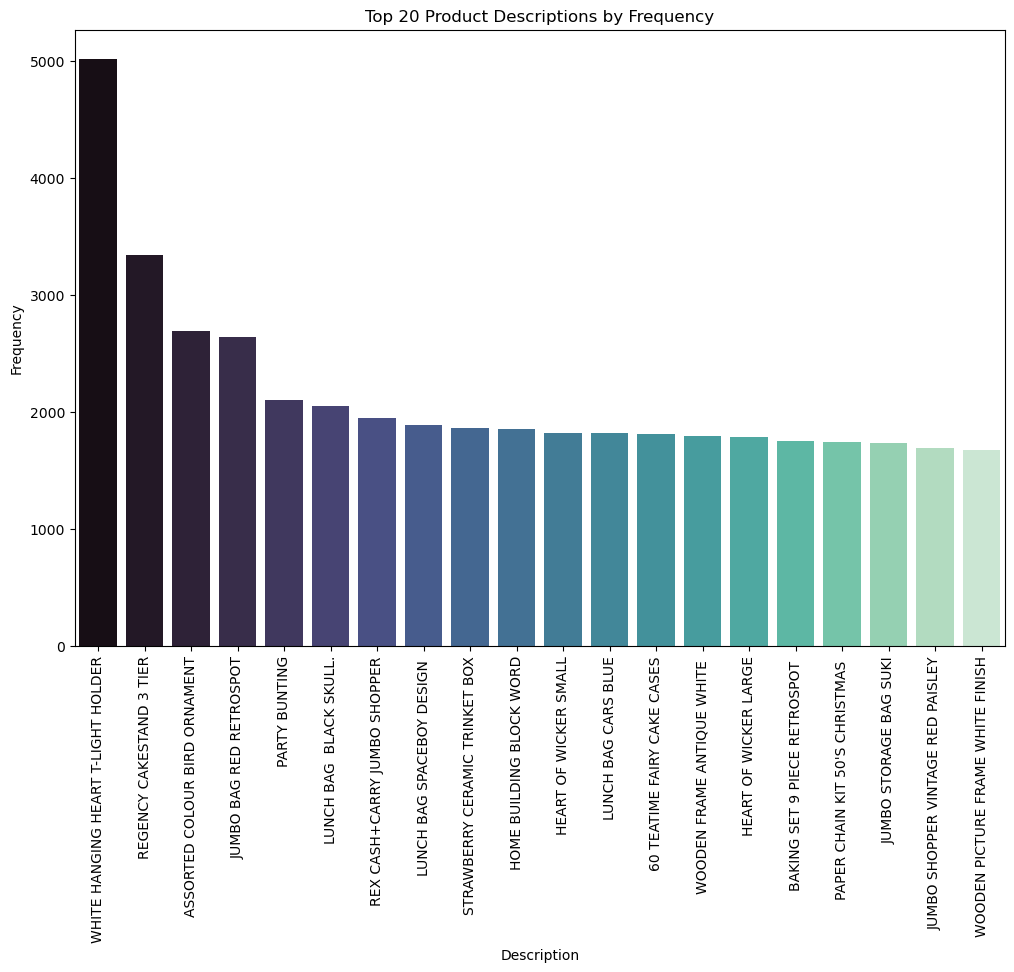

In [17]:
# Count occurrences of each description
description_counts = df['Description'].value_counts()

# Select the top 20 descriptions
top_20_descriptions = description_counts.head(20)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_descriptions.index, y=top_20_descriptions.values, palette='mako')

# Adding titles and labels
plt.title('Top 20 Product Descriptions by Frequency')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.savefig("descriptions.png")
plt.show()

In [18]:
# Identify non-capitalized descriptions
non_capitalized_descriptions = df[df['Description'].apply(lambda x: not x.isupper())]

# Count the number of non-capitalized descriptions
num_non_capitalized = non_capitalized_descriptions['Description'].nunique()

# Display non-capitalized descriptions and count
print(f"Number of non-capitalized descriptions: {num_non_capitalized}")
print(non_capitalized_descriptions['Description'].unique())

Number of non-capitalized descriptions: 29
['BAG 500g SWIRLY MARBLES' 'POLYESTER FILLER PAD 40x40cm'
 'POLYESTER FILLER PAD 60x40cm' 'POLYESTER FILLER PAD 65CMx65CM'
 'POLYESTER FILLER PAD 45x45cm' 'BAG 125g SWIRLY MARBLES'
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE' 'FOLK ART GREETING CARD,pack/12'
 'BAG 250g SWIRLY MARBLES' 'POLYESTER FILLER PAD 30CMx30CM'
 ' Bank Charges' 'This is a test product.'
 'Adjustment by john on 26/01/2010 16'
 'Adjustment by john on 26/01/2010 17' 'POLYESTER FILLER PAD 45x30cm'
 'Bank Charges' ' SET Of 6 SOLDIER SKITTLES'
 'THE KING GIFT BAG 25x24x12cm' 'Adjustment by Peter on Jun 25 2010 '
 'FRENCH BLUE METAL DOOR SIGN, No' 'NUMBER TILE COTTAGE GARDEN, No'
 'NUMBER TILE VINTAGE FONT, No ' 'NUMBER TILE VINTAGE FONT No '
 'FRENCH BLUE METAL DOOR SIGN No' 'NUMBER TILE COTTAGE GARDEN No'
 '3 TRADITIONAl BISCUIT CUTTERS  SET' 'FLOWERS HANDBAG blue and orange'
 'Next Day Carriage' 'High Resolution Image']


In [19]:
# List of weird descriptions
weird_descriptions = [
    ' Bank Charges',
    'This is a test product.',
    'Adjustment by john on 26/01/2010 16',
    'Adjustment by john on 26/01/2010 17',
    'Bank Charges',
    'Adjustment by Peter on Jun 25 2010 ',
    'Next Day Carriage',
    'High Resolution Image'
]

# Count occurrences of each weird description
description_counts = df['Description'].value_counts()

# Filter counts for the weird descriptions
weird_description_counts = {desc: description_counts.get(desc, 0) for desc in weird_descriptions}

# Display the results
for desc, count in weird_description_counts.items():
    print(f"'{desc}': {count} times")

' Bank Charges': 2 times
'This is a test product.': 12 times
'Adjustment by john on 26/01/2010 16': 18 times
'Adjustment by john on 26/01/2010 17': 14 times
'Bank Charges': 29 times
'Adjustment by Peter on Jun 25 2010 ': 3 times
'Next Day Carriage': 79 times
'High Resolution Image': 3 times


In [20]:
# Drop rows with the weird descriptions
df = df[~df['Description'].isin(weird_descriptions)]

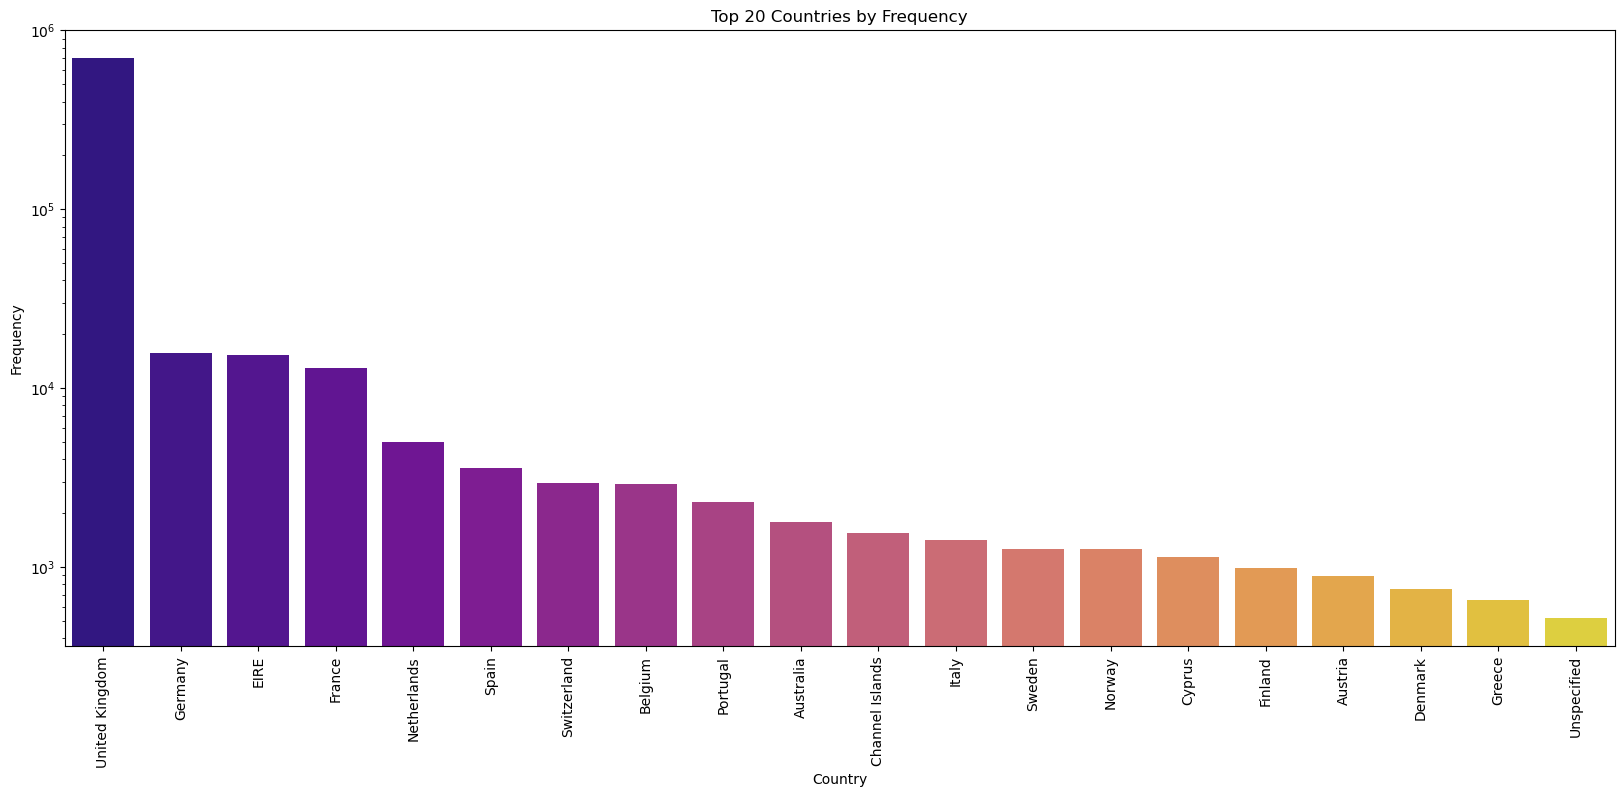

In [21]:
# Count occurrences of each country
country_counts = df['Country'].value_counts()

# Select the top 20 descriptions
top_20_country = country_counts.head(20)

# Create the bar chart
plt.figure(figsize=(20, 8))
sns.barplot(x=top_20_country.index, y=top_20_country.values, palette='plasma')

# Adding titles and labels
plt.title('Top 20 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.yscale("log")
plt.savefig("top20_country.png")
plt.show()

### Feature Engineering

In [22]:
# Generate new column TotalPurchase 
df['Total_purchase'] = df['Quantity'] * df['Price']

In [23]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract Invoice Day of Week
df['invoice_day_of_week'] = df['InvoiceDate'].dt.strftime('%A')  # Extract weekday name

# Extract Invoice Month
df['invoice_month'] = df['InvoiceDate'].dt.month_name()  # Extract full month name

# One-hot encode the day of the week and month
df = pd.get_dummies(df, columns=['invoice_day_of_week', 'invoice_month'], prefix=['day_of_week', 'month'])

# Display the first few rows to confirm changes
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total_purchase  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom           100.8   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            30.0   

   day_of_week_Friday  ...  month_December  month_February  month_January  \
0               False  ...            T

In [24]:
# List of boolean columns to convert to integers
bool_columns = [
    'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 
    'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 
    'day_of_week_Wednesday', 'month_April', 'month_August', 
    'month_December', 'month_February', 'month_January', 
    'month_July', 'month_June', 'month_March', 'month_May', 
    'month_November', 'month_October', 'month_September'
]

# Convert specified boolean columns to integers (0 and 1)
df[bool_columns] = df[bool_columns].astype(int)

# Display the first few rows to confirm changes
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total_purchase  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom           100.8   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            30.0   

   day_of_week_Friday  ...  month_December  month_February  month_January  \
0                   0  ...             

In [25]:
# Select day of week columns
day_of_week_columns = ['day_of_week_Monday', 'day_of_week_Tuesday', 
                       'day_of_week_Wednesday', 'day_of_week_Thursday', 
                      'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday']

# Count the number of times the value is 1 for each column
day_of_week_counts = df[day_of_week_columns].apply(lambda x: (x == 1).sum())

# Display the counts
print(day_of_week_counts)

day_of_week_Monday       124456
day_of_week_Tuesday      133492
day_of_week_Wednesday    130282
day_of_week_Thursday     155406
day_of_week_Friday       102650
day_of_week_Saturday        400
day_of_week_Sunday       129872
dtype: int64


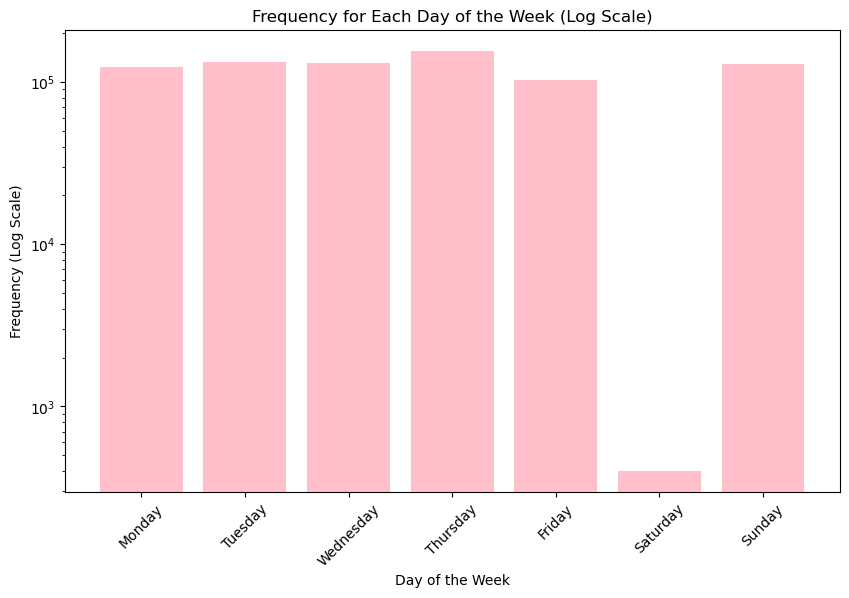

In [26]:
# Bar chart for day of week counts with a logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index.str.replace('day_of_week_', ''), day_of_week_counts.values, color='pink')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Frequency (Log Scale)')
plt.title('Frequency for Each Day of the Week (Log Scale)')

# Set a logarithmic scale for the y-axis
plt.yscale('log')

# Display the bar chart
plt.xticks(rotation=45)  
plt.savefig("daysoftheweek.png")
plt.show()

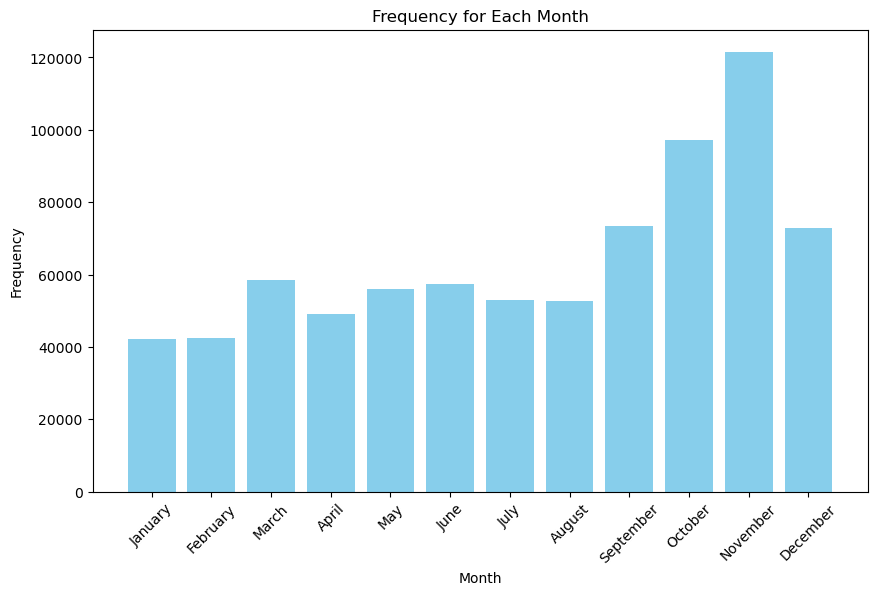

In [27]:
# List of the month columns
month_columns = [
    'month_January', 'month_February', 'month_March', 'month_April',
    'month_May', 'month_June', 'month_July', 'month_August',
    'month_September', 'month_October', 'month_November', 'month_December'
]

# Count the occurrences of 1 for each month column
month_counts = df[month_columns].sum()

# Bar chart for month counts
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index.str.replace('month_', ''), month_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency for Each Month')

# Display the bar chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig("months.png")
plt.show()

In [28]:
# Filter the DataFrame to get rows where Price is 0
price_zero_df = df[df['Price'] == 0]

# Display the result
price_zero_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_purchase,day_of_week_Friday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom,0.0,0,...,1,0,0,0,0,0,0,0,0,0
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom,0.0,0,...,1,0,0,0,0,0,0,0,0,0
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0.0,0,...,1,0,0,0,0,0,0,0,0,0
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0.0,0,...,1,0,0,0,0,0,0,0,0,0
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom,0.0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
# Remove rows where Price is 0
df = df[df['Price'] != 0]

# Display the first few rows to verify
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Total_purchase,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
count,776498.000000,776498,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,...,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000,776498.000000
mean,13.520531,2011-01-03 00:02:59.846851072,2.933292,15326.589775,21.979935,0.132177,0.160270,0.000515,0.167250,0.200106,...,0.093667,0.054841,0.054432,0.068268,0.073929,0.075206,0.072262,0.156637,0.125148,0.094657
min,1.000000,2009-12-01 07:45:00,0.030000,12346.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2010-07-02 14:15:00,1.250000,13979.000000,4.950000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2010-12-02 13:38:00,1.950000,15253.000000,12.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,2011-08-01 13:11:00,3.750000,16795.000000,19.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,146.104072,NaN,4.291967,1692.865441,225.944464,0.338683,0.366856,0.022691,0.373199,0.400080,...,0.291365,0.227670,0.226867,0.252205,0.261656,0.263723,0.258921,0.363458,0.330887,0.292741


In [30]:
# Filter the DataFrame to get rows where Price is 0
price_zero_df = df[df['Total_purchase'] < 1]

# Display the result
price_zero_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_purchase,day_of_week_Friday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
389,489517,22335,HEART DECORATION PAINTED ZINC,1,2009-12-01 11:34:00,0.65,16329.0,United Kingdom,0.65,0,...,1,0,0,0,0,0,0,0,0,0
393,489517,21790,VINTAGE SNAP CARDS,1,2009-12-01 11:34:00,0.85,16329.0,United Kingdom,0.85,0,...,1,0,0,0,0,0,0,0,0,0
630,489529,22030,SWALLOWS GREETING CARD,1,2009-12-01 11:51:00,0.42,17984.0,United Kingdom,0.42,0,...,1,0,0,0,0,0,0,0,0,0
631,489529,21081,SET/20 POSIES PAPER NAPKINS,1,2009-12-01 11:51:00,0.85,17984.0,United Kingdom,0.85,0,...,1,0,0,0,0,0,0,0,0,0
642,489529,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,1,2009-12-01 11:51:00,0.85,17984.0,United Kingdom,0.85,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
# Create a new column 'is_UK', assigning 1 for 'United Kingdom' and 0 for others
df['is_UK'] = df['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Display the first few rows to verify
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_purchase,day_of_week_Friday,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,is_UK
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,0,...,0,0,0,0,0,0,0,0,0,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,0,...,0,0,0,0,0,0,0,0,0,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,0,...,0,0,0,0,0,0,0,0,0,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,0,...,0,0,0,0,0,0,0,0,0,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,0,...,0,0,0,0,0,0,0,0,0,1


### Find outliers

In [32]:
# Select relevant columns for outlier detection
columns_for_outliers = ['Price', 'Quantity', 'Total_purchase']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[columns_for_outliers].quantile(0.15)
Q3 = df[columns_for_outliers].quantile(0.85)

# Compute IQR
IQR = Q3 - Q1

# Detect outliers: Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
outliers = (df[columns_for_outliers] < (Q1 - 1.5 * IQR)) | (df[columns_for_outliers] > (Q3 + 1.5 * IQR))

# Count the number of outliers per column
outlier_counts = outliers.sum()

# Filter out the rows that have any outliers
outlier_rows = df[outliers.any(axis=1)]

print("Outlier counts per column:")
print(outlier_counts)

print(f"\nNumber of rows with any outliers: {outlier_rows.shape[0]}")
print(outlier_rows.head())

Outlier counts per column:
Price             16766
Quantity          36728
Total_purchase    41447
dtype: int64

Number of rows with any outliers: 70558
   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   

           InvoiceDate  Price  Customer ID         Country  Total_purchase  \
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom            83.4   
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom           100.8   
13 2009-12-01 09:06:00   5.45 

In [33]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model with contamination level of 10%
model = IsolationForest(contamination=0.20, random_state=0)

# Select the relevant numerical columns to check for outliers
columns_for_outliers = ['Price', 'Quantity', 'Total_purchase']

# Fit the model and calculate outlier scores (fit on the selected columns)
df['Outlier_Scores'] = model.fit_predict(df[columns_for_outliers])

# Create a new column to identify outliers (-1 for outliers, 1 for inliers)
df['Is_Outlier'] = df['Outlier_Scores'].apply(lambda x: 1 if x == -1 else 0)

# Display the first few rows of the DataFrame to check results
print(df.head())

# Count the number of outliers and inliers
outlier_count = df['Is_Outlier'].sum()
inlier_count = len(df) - outlier_count

print(f"Number of outliers detected: {outlier_count}")
print(f"Number of inliers: {inlier_count}")

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total_purchase  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom           100.8   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            30.0   

   day_of_week_Friday  ...  month_July  month_June  month_March  month_May  \
0                   0  ...           0

In [34]:
# Separate the outliers for analysis
outliers_data = df[df['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
df = df[df['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns from the cleaned dataset
df = df.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
df.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_purchase,day_of_week_Friday,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,is_UK
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,0,...,0,0,0,0,0,0,0,0,0,1
1,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,0,...,0,0,0,0,0,0,0,0,0,1
2,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,0,...,0,0,0,0,0,0,0,0,0,1
3,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,0,...,0,0,0,0,0,0,0,0,0,1
4,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,17.85,0,...,0,0,0,0,0,0,0,0,0,1


## Normalize the data

In [35]:
from scipy.stats import shapiro

# Apply Shapiro-Wilk test to each numerical column in customer_df
for column in ['Price', 'Quantity', 'Total_purchase']:
    stat, p_value = shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"  Statistic={stat}, p-value={p_value}")
    if p_value < 0.05:
        print(f"  The data in {column} does not appear to be normally distributed.")
    else:
        print(f"  The data in {column} appears to be normally distributed.")
    print()

Shapiro-Wilk test for Price:
  Statistic=0.8725029230117798, p-value=0.0
  The data in Price does not appear to be normally distributed.

Shapiro-Wilk test for Quantity:
  Statistic=0.8139246106147766, p-value=0.0
  The data in Quantity does not appear to be normally distributed.

Shapiro-Wilk test for Total_purchase:
  Statistic=0.9294184446334839, p-value=0.0
  The data in Total_purchase does not appear to be normally distributed.



In [36]:
# Apply natural logarithm transformation
df['log_Quantity'] = np.log(df['Quantity'] + 1)  # Adding 1 to avoid log(0)
df['log_Price'] = np.log(df['Price'] + 1)
df['log_Total_purchase'] = np.log(df['Total_purchase'] + 1)

In [37]:
# Get descriptive statistics for specific columns
desc_stats = df[['Price', 'Quantity', 'Total_purchase']].describe()

print(desc_stats)

               Price       Quantity  Total_purchase
count  622817.000000  622817.000000   622817.000000
mean        2.202107       6.892961       10.909190
std         1.569286       6.316747        7.950135
min         0.220000       1.000000        0.360000
25%         1.250000       2.000000        3.800000
50%         1.650000       5.000000       10.080000
75%         2.950000      12.000000       15.900000
max         7.950000      28.000000       37.050000


In [38]:
from scipy.stats import shapiro

# Apply Shapiro-Wilk test to each numerical column in customer_df
for column in ['log_Quantity', 'log_Price', 'log_Total_purchase']:
    stat, p_value = shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"  Statistic={stat}, p-value={p_value}")
    if p_value < 0.05:
        print(f"  The data in {column} does not appear to be normally distributed.")
    else:
        print(f"  The data in {column} appears to be normally distributed.")
    print()

Shapiro-Wilk test for log_Quantity:
  Statistic=0.9240524172782898, p-value=0.0
  The data in log_Quantity does not appear to be normally distributed.

Shapiro-Wilk test for log_Price:
  Statistic=0.9717838168144226, p-value=0.0
  The data in log_Price does not appear to be normally distributed.

Shapiro-Wilk test for log_Total_purchase:
  Statistic=0.9538493752479553, p-value=0.0
  The data in log_Total_purchase does not appear to be normally distributed.



In [39]:
# Creating a new DataFrame with the specified columns in the requested order and renaming the columns
df_clean = df[['Customer ID', 'log_Quantity', 'log_Price', 'log_Total_purchase', 'is_UK',
               'day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday',
               'month_January', 'month_February',  'month_March', 'month_April', 'month_May', 'month_June', 'month_July', 'month_August', 'month_September', 'month_October',
                'month_November', 'month_December',
      ]].copy()

# Renaming the columns
df_clean.rename(columns={
    'log_Quantity': 'quantity',
    'log_Price': 'price',
    'log_Total_purchase': 'total_purchase'
}, inplace=True)

# Display the first few rows of the cleaned dataset
print(df_clean.head())

   Customer ID  quantity     price  total_purchase  is_UK  day_of_week_Monday  \
0      13085.0  3.218876  0.810930        3.433987      1                   0   
1      13085.0  3.218876  0.810930        3.433987      1                   0   
2      13085.0  2.564949  1.266948        3.453157      1                   0   
3      13085.0  2.564949  1.266948        3.453157      1                   0   
4      13078.0  1.386294  1.938742        2.936513      1                   0   

   day_of_week_Tuesday  day_of_week_Wednesday  day_of_week_Thursday  \
0                    1                      0                     0   
1                    1                      0                     0   
2                    1                      0                     0   
3                    1                      0                     0   
4                    1                      0                     0   

   day_of_week_Friday  ...  month_March  month_April  month_May  month_June  \
0      

In [40]:
df_clean.describe()

,Customer ID,quantity,price,total_purchase,is_UK,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,...,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
count,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,...,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000,622817.000000
mean,15360.905274,1.765433,1.059911,2.209569,0.911081,0.160861,0.169613,0.164299,0.197994,0.130303,...,0.075865,0.062721,0.070713,0.073018,0.068038,0.067217,0.094752,0.126601,0.159925,0.092469
std,1691.596295,0.779981,0.445932,0.787402,0.284626,0.367403,0.375293,0.370547,0.398488,0.336637,...,0.264782,0.242462,0.256344,0.260167,0.251811,0.250398,0.292872,0.332525,0.366537,0.289687
min,12346.000000,0.693147,0.198851,0.307485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14020.000000,1.098612,0.810930,1.568616,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15311.000000,1.791759,0.974560,2.405142,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16834.000000,2.564949,1.373716,2.827314,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18287.000000,3.367296,2.191654,3.638901,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


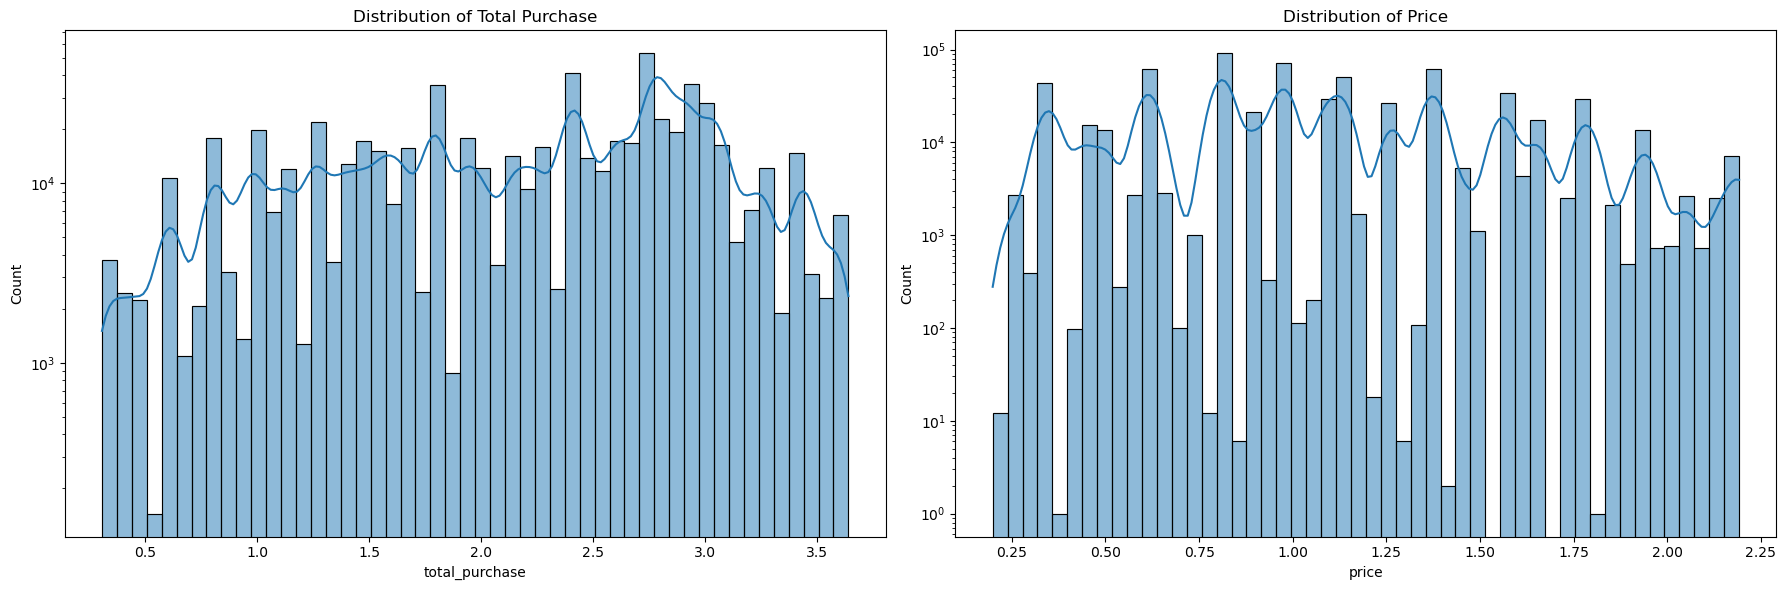

In [41]:
# Plot histograms for transformed variables with logarithmic y-axis
plt.figure(figsize=(18, 6))

# Total Purchase distribution
plt.subplot(1, 2, 1)
sns.histplot(df_clean['total_purchase'], kde=True, bins=50)
plt.yscale('log')
plt.title('Distribution of Total Purchase')

# Price distribution
plt.subplot(1, 2, 2)
sns.histplot(df_clean['price'], kde=True, bins=50)
plt.yscale('log')
plt.title('Distribution of Price')

plt.tight_layout()
plt.savefig("distribution_totalp_price.png")
plt.show()

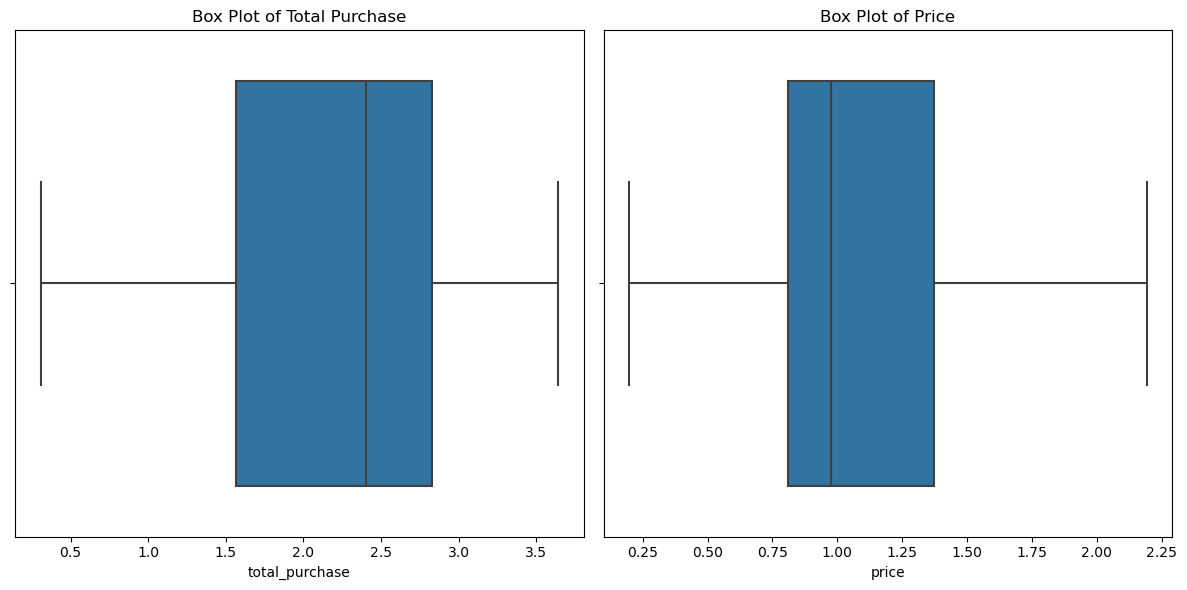

In [42]:
# Plot box plots for 'total_purchase' and 'price'
plt.figure(figsize=(12, 6))

# Box plot for Total Purchase
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['total_purchase'])
plt.title('Box Plot of Total Purchase')

# Box plot for Price
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['price'])
plt.title('Box Plot of Price')

plt.tight_layout()
plt.savefig("boxplot_totalp_price.png")
plt.show()

## Check for multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric variables only for VIF calculation
X = df_clean[['quantity', 'price', 'total_purchase']]

# Add constant (intercept) for the regression model
X['intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove 'intercept' after calculation
X = X.drop('intercept', axis=1)
print(vif_data)

         Variable        VIF
0        quantity  39.055857
1           price  21.688550
2  total_purchase  35.370078
3       intercept  83.632730


In [44]:
# Drop the 'quantity' column
df_clean = df_clean.drop(columns=['quantity'])

In [45]:
# Select numeric variables, and drop one category from each dummy-encoded categorical variable
X = df_clean[['price', 'total_purchase', 'is_UK', 
              'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday', 
              'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday',  # Dropped 'Monday'
              'month_February', 'month_March', 'month_April', 'month_May', 
              'month_June', 'month_July', 'month_August', 'month_September', 
              'month_October', 'month_November', 'month_December']]  # Dropped 'January'

# Add constant (intercept) for the regression model
X['intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove 'intercept' after calculation
X = X.drop('intercept', axis=1)

# Display the VIF data
print(vif_data)

                 Variable        VIF
0                   price   1.120936
1          total_purchase   1.200694
2                   is_UK   1.052875
3     day_of_week_Tuesday   1.709413
4   day_of_week_Wednesday   1.692300
5    day_of_week_Thursday   1.795051
6      day_of_week_Friday   1.578222
7    day_of_week_Saturday   1.007552
8      day_of_week_Sunday   1.753065
9          month_February   1.912098
10            month_March   2.230691
11            month_April   2.034112
12              month_May   2.153018
13             month_June   2.188247
14             month_July   2.113710
15           month_August   2.101177
16        month_September   2.503229
17          month_October   2.932947
18         month_November   3.348434
19         month_December   2.478359
20              intercept  48.420640


In [46]:
# Save cleaned dataframe to CSV
df_clean.to_csv('clean_retail.csv')

## Multiple Linear Regression

In [47]:
from sklearn.linear_model import RidgeCV, LassoCV, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

In [48]:
import statsmodels.api as sm

# Define the backward elimination function
def backward_elimination(X, y, significance_level=0.05):
    num_vars = X.shape[1]
    for i in range(num_vars):
        # Fit the model with all predictors
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        
        if max_p_value > significance_level:
            # Get index of predictor with highest P-value and remove it
            excluded_index = regressor_OLS.pvalues.argmax()
            X = X.drop(X.columns[excluded_index], axis=1)
        else:
            break
    return X

# Define independent variables (X) and target variable (y)
X = df_clean[
    ['price', 'is_UK', 'day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 
     'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday', 
     'month_January', 'month_February', 'month_March', 'month_April', 'month_May', 'month_June', 
     'month_July', 'month_August', 'month_September', 'month_October', 'month_November', 
     'month_December']
]
y = df_clean['total_purchase']

# Add a constant term to the model
X = sm.add_constant(X)

# Perform backward elimination
X_optimized = backward_elimination(X, y)

# Fit the final optimized model
final_model = sm.OLS(y, X_optimized).fit()

# Check the summary of the final model
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_purchase   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     6579.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:48:54   Log-Likelihood:            -6.7792e+05
No. Observations:              622817   AIC:                         1.356e+06
Df Residuals:                  622797   BIC:                         1.356e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0021      0.007    300.678      0.000       1.989       2.015
price                     0.5577      0.002    272.949      0.000       0.554       0.562
is_UK                    -0.5255      0.003   -163.485      0.000      -0.532      -0.519
day_of_week_Monday        0.2040      0.006     35.893      0.000       0.193       0.215
day_of_week_Tuesday       0.2390      0.006     42.160      0.000       0.228       0.250
day_of_week_Wednesday     0.2279      0.006     40.158      0.000       0.217       0.239
day_of_week_Thursday      0.2493      0.006     44.411      0.000       0.238       0.260
day_of_week_Friday        0.2662      0.006     46.256      0.000       0.255       0.277
day_of_week_Saturday      0.8543      0.037     23.194      0.000       0.782       0.927
day_of_week_Sunday       -0.0386      0.006     -6.809      0.000      -0.050      -0.027
month_January            -0.0610      0.005    -12.412      0.000      -0.071      -0.051
month_February           -0.0700      0.005    -14.335      0.000      -0.080      -0.060
month_March              -0.0808      0.004    -18.203      0.000      -0.090      -0.072
month_April              -0.0464      0.005     -9.885      0.000      -0.056      -0.037
month_May                -0.0286      0.005     -6.310      0.000      -0.037      -0.020
month_June               -0.0866      0.004    -19.303      0.000      -0.095      -0.078
month_July               -0.0726      0.005    -15.867      0.000      -0.082      -0.064
month_August             -0.0231      0.005     -5.035      0.000      -0.032      -0.014
month_October            -0.1063      0.004    -27.149      0.000      -0.114      -0.099
month_November           -0.2065      0.004    -55.256      0.000      -0.214      -0.199
month_December           -0.1708      0.004    -40.507      0.000      -0.179      -0.163
==============================================================================
Omnibus:                   101054.785   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26049.809
Skew:                          -0.192   Prob(JB):                         0.00
Kurtosis:                       2.075   Cond. No.                     1.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# Split the data into training and testing sets using the optimized features
X_train, X_test, y_train, y_test = train_test_split(X_optimized, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import RidgeCV, LassoCV

# Find best alpha for ridge
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.alpha_
print(f'Best Alpha for Ridge: {best_alpha_ridge}')

# Find best alpha for lasso
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.alpha_
print(f'Best Alpha for Lasso: {best_alpha_lasso}')

Best Alpha for Ridge: 0.1
Best Alpha for Lasso: 0.01


In [51]:
from sklearn.linear_model import Ridge, Lasso

# Train the Model on ridge
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Train the model on lasso
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error

# Find the mean squared error for both regressions
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f'Ridge MSE: {ridge_mse}')
print(f'Lasso MSE: {lasso_mse}')

# Select the model with the lower MSE
if ridge_mse < lasso_mse:
    print('Use Ridge Regression.')
else:
    print('Use Lasso Regression.')

Ridge MSE: 0.5138807813474537
Lasso MSE: 0.5195912543931163
Use Ridge Regression.


In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared and MSE
r_squared_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Ridge R-squared: {r_squared_ridge}')
print(f'Ridge Mean Squared Error: {mse_ridge}')

Ridge R-squared: 0.16857439220811032
Ridge Mean Squared Error: 0.5138807813474537


In [54]:
# Perform ANOVA (F-test) to understand feature significance
f_stats, p_values = f_regression(X_train, y_train)
anova_results = pd.DataFrame({
    'Feature': X_train.columns,
    'F-Statistic': f_stats,
    'P-Value': p_values
})
print("\nANOVA Results:")
print(anova_results.sort_values(by='P-Value'))


ANOVA Results:
                  Feature   F-Statistic        P-Value
1                   price  55323.975158   0.000000e+00
2                   is_UK  21545.913064   0.000000e+00
9      day_of_week_Sunday  11669.704277   0.000000e+00
19         month_November   2500.780574   0.000000e+00
7      day_of_week_Friday   1046.659892  2.244691e-229
6    day_of_week_Thursday    981.075975  3.780926e-215
4     day_of_week_Tuesday    426.074934   1.273237e-94
20         month_December    334.997026   8.299309e-75
17           month_August    306.082221   1.633968e-68
5   day_of_week_Wednesday    287.447184   1.866050e-64
14              month_May    258.833878   3.187216e-58
8    day_of_week_Saturday    174.302723   8.633172e-40
13            month_April    151.252535   9.337759e-35
10          month_January    104.814210   1.348974e-24
18          month_October     72.455652   1.712909e-17
3      day_of_week_Monday     65.720797   5.207085e-16
11         month_February     64.057010   1.21127

In [68]:
anova_results

,Feature,F-Statistic,P-Value
0,const,0.000000,1.000000e+00
1,price,55323.975158,0.000000e+00
2,is_UK,21545.913064,0.000000e+00
3,day_of_week_Monday,65.720797,5.207085e-16
4,day_of_week_Tuesday,426.074934,1.273237e-94
5,day_of_week_Wednesday,287.447184,1.866050e-64
6,day_of_week_Thursday,981.075975,3.780926e-215
7,day_of_week_Friday,1046.659892,2.244691e-229
8,day_of_week_Saturday,174.302723,8.633172e-40
9,day_of_week_Sunday,11669.704277,0.000000e+00


## Clustering

In [55]:
# Extract a sample size to conserve computational power
sample_size = 10000  
sample_df = df_clean.sample(n=sample_size, random_state=42)

In [56]:
# Create a new DataFrame with just 'TotalCharge' and 'Income'
clustering_df = sample_df[['total_purchase', 'price']].copy()

# Display the new DataFrame
print(clustering_df)

        total_purchase     price
381337        2.415914  0.615186
137997        2.928524  1.373716
585610        0.604316  0.604316
438314        2.772589  0.810930
441227        2.909084  1.358409
...                ...       ...
140173        1.931521  1.373716
102646        2.912351  0.896088
425389        1.124930  1.124930
504128        2.862201  0.974560
338261        2.388763  1.783391

[10000 rows x 2 columns]


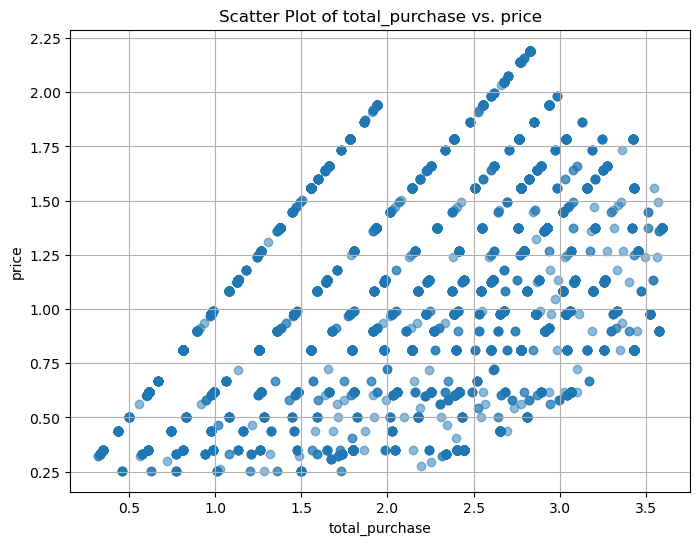

In [57]:
# Plotting Total Purchase vs. Price
plt.figure(figsize=(8, 6))
plt.scatter(clustering_df['total_purchase'], clustering_df['price'], alpha=0.5)
plt.title('Scatter Plot of total_purchase vs. price')
plt.xlabel('total_purchase')
plt.ylabel('price')
plt.grid(True)
plt.savefig("t1_scatterplot.png")
plt.show()

In [58]:
# Call describe() method for the two variables
description = clustering_df.describe()

description

,total_purchase,price
count,10000.000000,10000.000000
mean,2.200981,1.054343
std,0.801033,0.444249
min,0.322083,0.254642
25%,1.558145,0.810930
50%,2.397895,0.974560
75%,2.827314,1.373716
max,3.594569,2.191654


In [59]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the variables
scaled_data = scaler.fit_transform(clustering_df)

# Create a new DataFrame with the scaled variables
scaled_df = pd.DataFrame(scaled_data, columns=['total_purchase', 'price'])

# Display the scaled DataFrame
scaled_df

,total_purchase,price
0,0.268332,-0.988588
1,0.908300,0.718941
2,-1.993357,-1.013057
3,0.713623,-0.547947
4,0.884031,0.684485
...,...,...
9995,-0.336407,0.718941
9996,0.888109,-0.356248
9997,-1.343397,0.158898
9998,0.825499,-0.179600


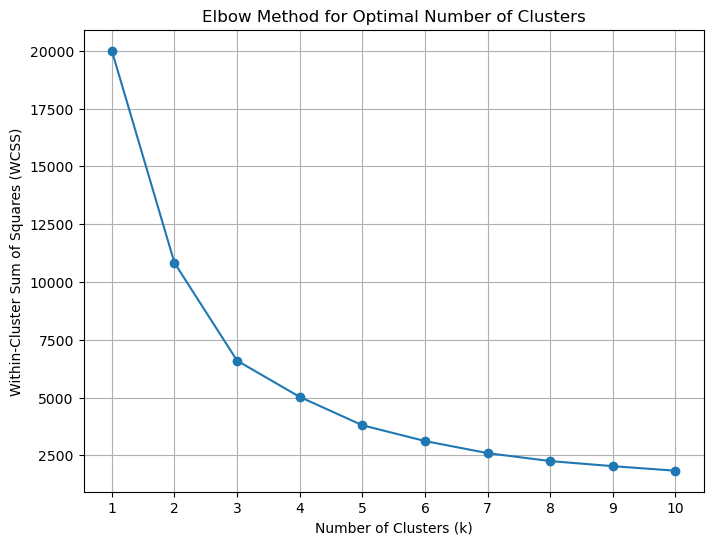

In [60]:
from sklearn.cluster import KMeans

# Calculate within-cluster sum of squares for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=300)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig("elbowmethod.png")
plt.show()

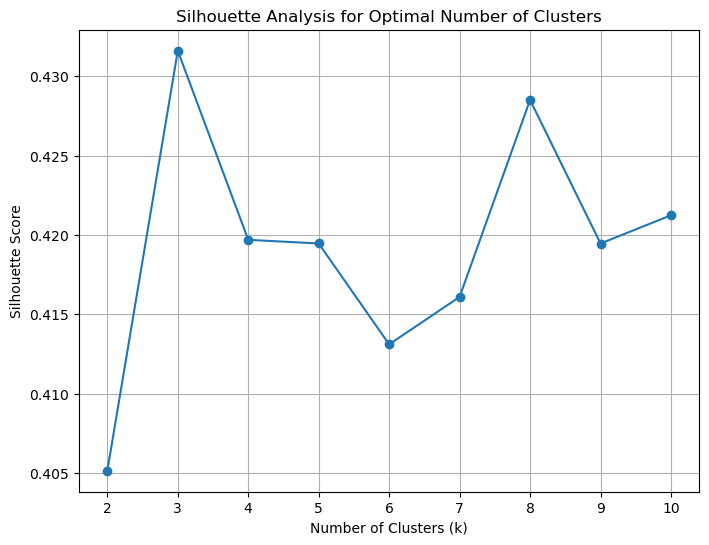

Optimal number of clusters: 3


In [61]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Range of clusters to try
min_clusters = 2
max_clusters = 10

# Compute silhouette score for each value of k
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k,n_init=25, random_state=300)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.savefig("silhouette.png")
plt.show()

# Find the optimal number of clusters with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + min_clusters
print("Optimal number of clusters:", optimal_k)

In [62]:
# Initialize KMeans with optimal_k clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=25, random_state=300)

# Fit KMeans to the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [63]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the scaled DataFrame
scaled_df_with_clusters = scaled_df.copy()
scaled_df_with_clusters['Cluster'] = cluster_labels

# Count patients per cluster
cluster_counts = scaled_df_with_clusters['Cluster'].value_counts()

# Display the count of patients per cluster
print(cluster_counts)

Cluster
0    3807
2    3131
1    3062
Name: count, dtype: int64


In [64]:
# Extract centroids with TotalCharge and Income columns
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=['total_purchase', 'price'])

# Display the centroids DataFrame
print(centroid_df)

   total_purchase     price
0        0.623788 -0.514771
1        0.477067  1.215699
2       -1.225022 -0.562995


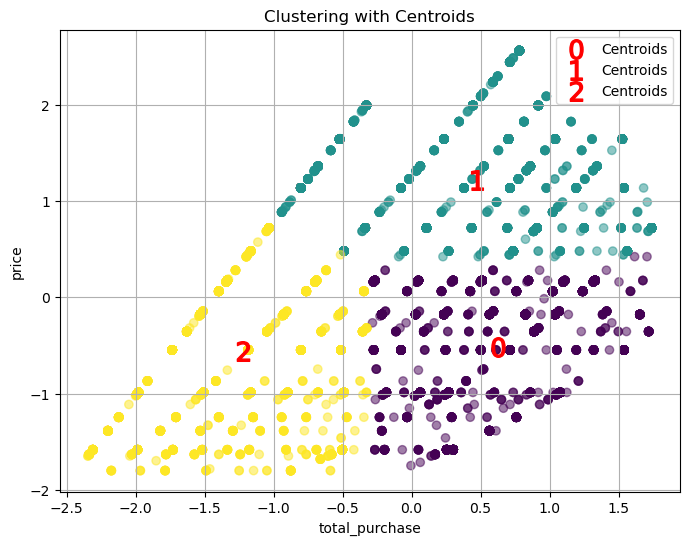

In [65]:
# Extract centroids
centroids = kmeans.cluster_centers_

# Plotting total purchase vs. price with centroids annotated with cluster numbers
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['total_purchase'], scaled_df['price'], c=cluster_labels, cmap='viridis', alpha=0.5)

# Plot centroids and annotate with cluster numbers
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='${}$'.format(i), s=200, c='red', label='Centroids')

plt.title('Clustering with Centroids')
plt.xlabel('total_purchase')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.savefig("centroids.png")
plt.show()

In [66]:
# Reset index of both DataFrames
scaled_df_with_clusters = scaled_df.copy().reset_index(drop=True)
sample_df_reset = sample_df.reset_index(drop=True)

# Add cluster labels and is_UK column
scaled_df_with_clusters['Cluster'] = cluster_labels
scaled_df_with_clusters['is_UK'] = sample_df_reset['is_UK']

# Display the DataFrame with labeled clusters and additional variables
scaled_df_with_clusters

,total_purchase,price,Cluster,is_UK
0,0.268332,-0.988588,0,0
1,0.908300,0.718941,1,1
2,-1.993357,-1.013057,2,1
3,0.713623,-0.547947,0,1
4,0.884031,0.684485,1,1
...,...,...,...,...
9995,-0.336407,0.718941,1,1
9996,0.888109,-0.356248,0,1
9997,-1.343397,0.158898,2,1
9998,0.825499,-0.179600,0,1


In [67]:
# Group by 'Cluster' column and calculate mean and median for specified columns
cluster_stats = scaled_df_with_clusters.groupby('Cluster').agg({
    'total_purchase': 'median',  # Use 'median' for total_purchase
    'price': 'mean',             # Use 'mean' for price
    'is_UK': 'mean'              # Use 'mean' for is_UK (to get the proportion of UK customers)
}).reset_index()

# Display the DataFrame with cluster statistics
cluster_stats

,Cluster,total_purchase,price,is_UK
0,0,0.713623,-0.514771,0.865511
1,1,0.712062,1.215699,0.912476
2,2,-1.183804,-0.562995,0.979559
